# Import Data

Importing required libraries and import data

In [1]:
import numpy as np
import pandas as pd
import customer_churn
import matplotlib.pyplot as plt

raw_data=pd.read_csv('customer_churn.csv')

display(raw_data.head(n=5))


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Exploration

Creating graphics to show the breakdown of values in the data

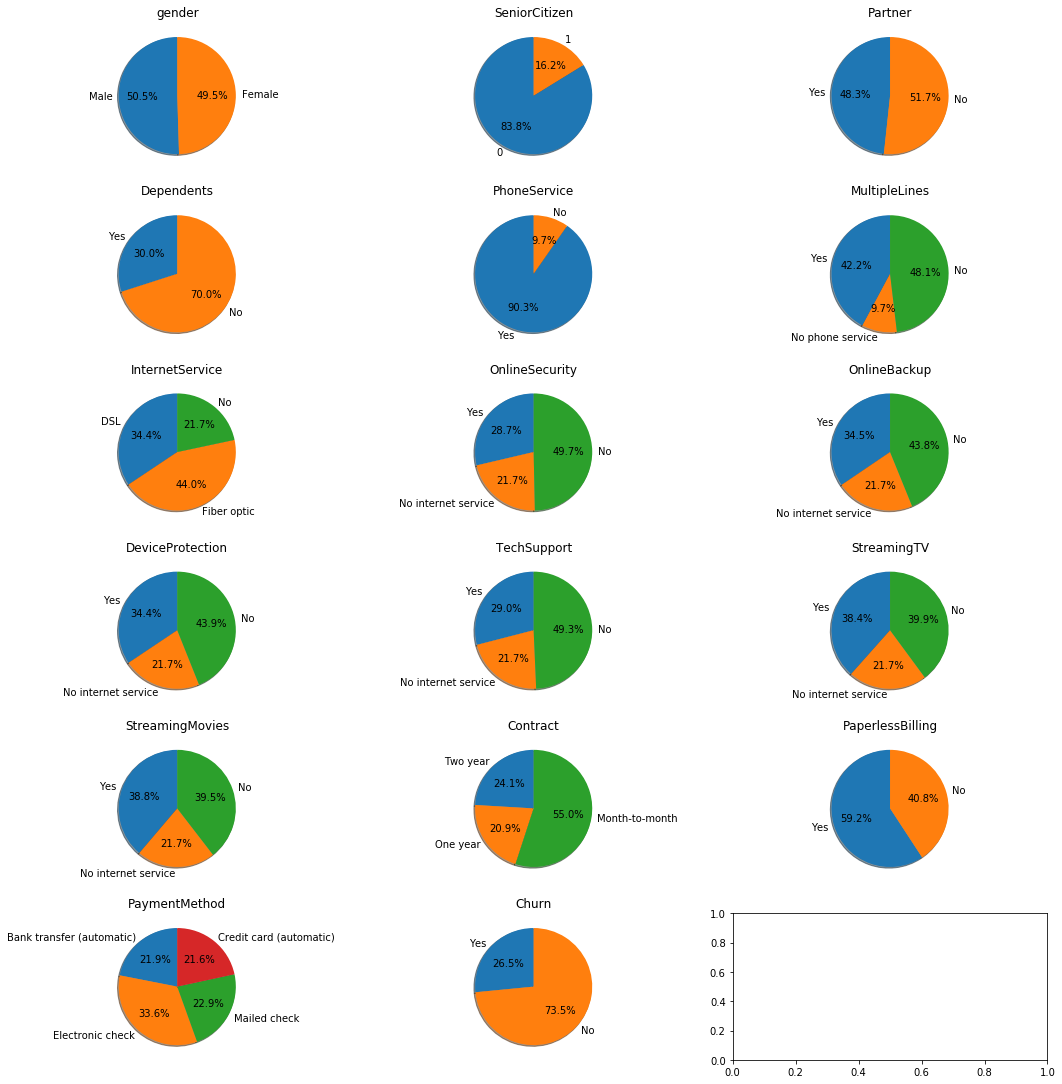

In [2]:

#initialise the plot
fig1, ax1 = plt.subplots(6,3,figsize=(15,15))
fig1.tight_layout()

#get fields that are be displayed in the pie chart
allFields=raw_data.columns.tolist()
fieldsToPie = [e for e in allFields if e not in ('customerID','tenure','MonthlyCharges','TotalCharges')]

x=0
for i in range(6):
    for j in range(3):
        if (i+j)==7:
            break
        unique, counts = np.unique(raw_data[fieldsToPie[x]], return_counts=True)
        d1=dict(zip(unique, counts))
        ax1[i,j].pie(d1.values(),  labels=d1.keys(), autopct='%1.1f%%',
        shadow=True, startangle=90)
        ax1[i,j].set(aspect="equal", title=fieldsToPie[x])
        x+=1

plt.show()

# Data Preprocessing


In [3]:
#use functions defined else where to clean up data
clean_data=customer_churn.clean_churn_data(raw_data)
new_data = clean_data.drop(columns=['has_Churned','customerID'])

display(new_data.head(n=5))

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,is_Male,has_Partner,has_Dependents,has_PhoneService,has_MultipleLines,has_OnlineSecurity,...,internet_DSL,internet_Fiberoptic,internet_No,contract_Month-to-month,contract_Oneyear,contract_Twoyear,payment_Banktransfer_automatic,payment_Creditcard_automatic,payment_Electroniccheck,payment_Mailedcheck
0,0,1,29.85,29.85,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1,0,34,56.95,1889.50,1,0,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,0,1,0,1,...,1,0,0,1,0,0,0,0,0,1
3,0,45,42.30,1840.75,1,0,0,0,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0


### Below shows the distribution of values post-processing

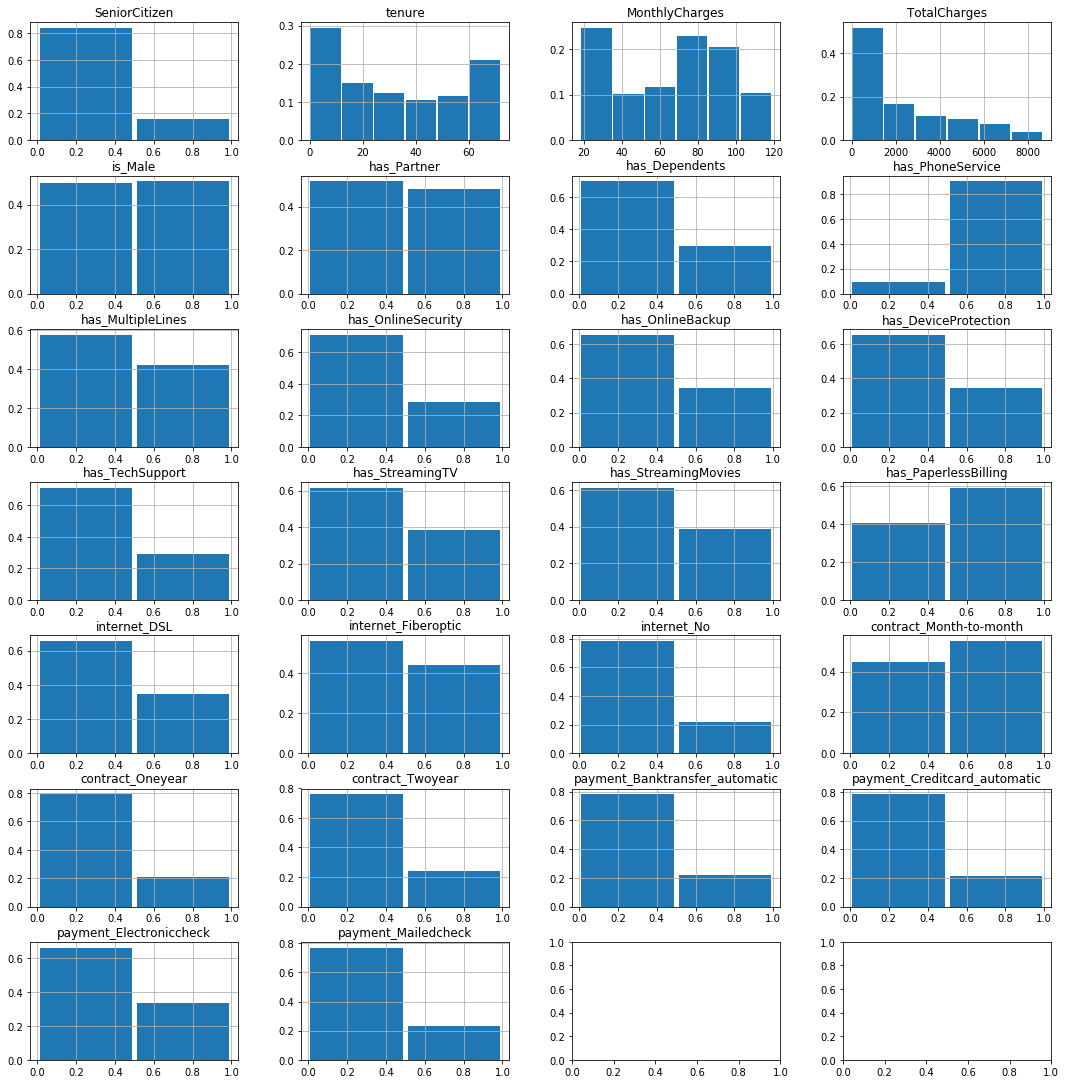

In [4]:
from itertools import combinations


fig, axes = plt.subplots(7,4,figsize=(15,15))
fig.tight_layout()


i = 0
for triaxis in axes:
    for axis in triaxis:
        if i>25:
            break
        unqValues=list(set(new_data[new_data.columns[i]]))
        if(len(unqValues))<6:
            custBins=(len(unqValues))
        else:
            custBins=6
            
        weights = np.ones_like(new_data[new_data.columns[i]])/float(len(new_data[new_data.columns[i]]))
        new_data.hist(column = new_data.columns[i], weights=weights,bins = custBins, ax=axis,rwidth=0.95)
        i = i+1
        
plt.show()

# Model Implementation

Import required libraries and apply SVC algorithnm 

In [5]:
from sklearn.svm import SVC
from sklearn.metrics import fbeta_score, accuracy_score
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
import time

# Split the data into training and testing sets(0.20) using the given feature as the target
X_train, X_test, y_train, y_test = train_test_split(new_data, clean_data['has_Churned'], test_size=0.20, random_state=0)

print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

#X values are scaled to improve the effeciency of the algorithm 
X_train = preprocessing.scale(X_train) 
X_test = preprocessing.scale(X_test) 

#Create an SVC object
clf = SVC()

start_time = time.time()
#Train the model
clf.fit(X_train, y_train)
print("Training time - %s seconds" % (time.time() - start_time))

start_time = time.time()
#Make predictions
predictions = clf.predict(X_test)
print("Prediction time - %s seconds" % (time.time() - start_time))

print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 1)))


/Users/mariamurphy/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Training set has 5634 samples.
Testing set has 1409 samples.
Training time - 0.850813865662 seconds
Prediction time - 0.128055095673 seconds
Accuracy score on testing data: 0.7928
F-score on testing data: 0.5466


# Model Refinement
Applying the Grid Search Algorithm to find the optimal paramaters

In [7]:
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer

#Combinations of paramaters to be explored
parameters = {'C': [1, 10, 100, 1000], 'kernel': ['linear','rbf','poly'], 'gamma': [1e-3, 1e-4], 'degree':[2, 3, 4, 5, 6]}

#Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=1)

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(SVC(),parameters, n_jobs=-1,scoring=scorer)

start_time = time.time()
# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train,y_train)
print("Training time - %s seconds" % (time.time() - start_time))


# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the optimized  model
start_time = time.time()
best_predictions = best_clf.predict(X_test)
print("Prediction time - %s seconds" % (time.time() - start_time))

#Display the optimal paramaters
print('Best C:',grid_fit.best_estimator_.C) 
print('Best Kernel:',grid_fit.best_estimator_.kernel)
print('Best Gamma:',grid_fit.best_estimator_.gamma)
print('Best Degree:',grid_fit.best_estimator_.degree)


# Report the before-and-afterscores
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 1)))
scores = grid_obj.grid_scores_


/Users/mariamurphy/anaconda2/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/Users/mariamurphy/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/mariamurphy/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/mariamurphy/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', '

Training time - 2219.028368 seconds
Prediction time - 0.0851709842682 seconds
('Best C:', 10)
('Best Kernel:', 'linear')
('Best Gamma:', 0.001)
('Best Degree:', 2)

Optimized Model
------
Final accuracy score on the testing data: 0.7984
Final F-score on the testing data: 0.5774


#### Display confusion matrix of results

In [8]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, best_predictions))

[[931 110]
 [174 194]]


#### Display results of grid search for linear model 

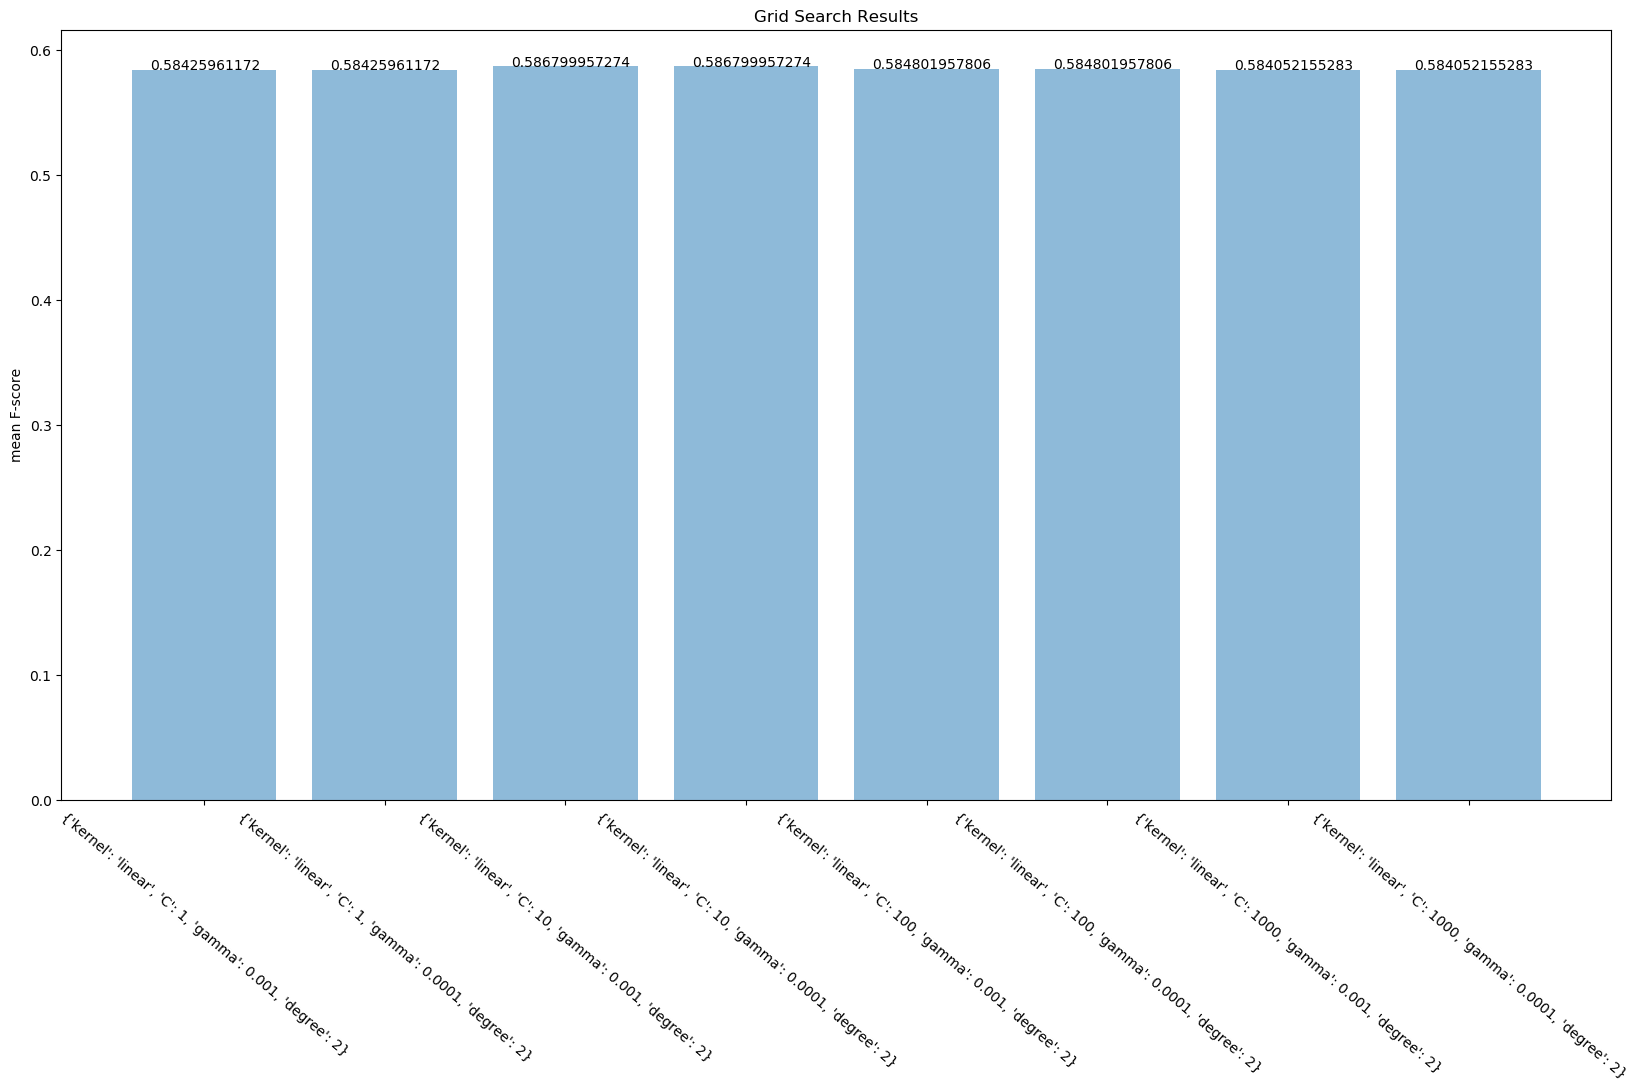

In [65]:
import matplotlib.pyplot as plt; plt.rcdefaults()


allmeans=[]
alllabels=[]

for i in scores:
    if ((i[0]['kernel'])=='linear') and ((i[0]['degree'])==2) :
        allmeans.append(i[1])
        alllabels.append(i[0])
 
 
y_pos = np.arange(len(alllabels))

plt.figure(figsize=(20,10))
plt.bar(y_pos, allmeans, align='center', alpha=0.5)
plt.xticks(y_pos, alllabels, rotation=-40)
plt.ylabel('mean F-score')
plt.title('Grid Search Results')
for a,b in zip(y_pos, allmeans):
    plt.text(a-0.3,b , str(b))
    
plt.show()


#### Test generalisation of model

In [16]:
def train_test_random_state(x, new_data, clean_data):

    print("Training and testing for random state "+str(x))

    X_train, X_test, y_train, y_test = train_test_split(new_data, clean_data['has_Churned'], test_size=0.20, random_state=x)

    #X values are scaled to improve the effeciency of the algorithm 
    X_train = preprocessing.scale(X_train) 
    X_test = preprocessing.scale(X_test) 

    clf = SVC(C=10, kernel='linear')
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    print("Random State "+ str(x) + ": Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
    print("Random State "+ str(x) + ": F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 1)))

for i in range(1,6):
    train_test_random_state(i,new_data,clean_data)


Training and testing for random state 1
Random State 1: Accuracy score on testing data: 0.8027
Random State 1: F-score on testing data: 0.5888
Training and testing for random state 2
Random State 2: Accuracy score on testing data: 0.7991
Random State 2: F-score on testing data: 0.5653
Training and testing for random state 3
Random State 3: Accuracy score on testing data: 0.8084
Random State 3: F-score on testing data: 0.5934
Training and testing for random state 4
Random State 4: Accuracy score on testing data: 0.7885
Random State 4: F-score on testing data: 0.5656
Training and testing for random state 5
Random State 5: Accuracy score on testing data: 0.7842
Random State 5: F-score on testing data: 0.5607
